# ADP 24회  복기
## 1. 결석일수 회귀분석 문제
(설명변수) 1. sex, 2. age, 3. Pstatus, 4. Medu, 5. Fedu, 6. guardian, 7. traveltime, 8. studytime, 9. failures, 10. famrel, 11. freetime.   
(종속변수) 12. absences

### 1-1-1. EDA 하시오 (시각화 포함)
### 1-1-2. 전처리 하시오 (시각화 포함)
### 1-1-3. 여기에 하지 않았지만 추가할 수 있는 전처리를 하시고, 타당한 이유와 기대효과를 쓰세요.

### 1-2-1. 적용 가능한 알고리즘 3개 언급하고, 그 중 2개를 선택한 이유를 논리적으로 설명하세요. 
### 1-2-2. 모델 성능 평가 지표를 뭘로 쓸건지, 그 이유는 뭔지 쓰세요.
### 1-2-3. 2개 알고리즘을 실제로 프로그래밍하고 성능 평가를 시각화 통해 비교하고 설명하세요.

### 1-3-1. 실제로 사용가능한 모델인지 설명해보세요.
### 1-3-2. 다양한 환경에서 적용할 수 있는 방안을 설명해보세요.
### 1-3-3. 추가적으로 모델을 개선할 수 있는 방안을 설명해보세요.

### 1-1-1. EDA 하시오 (시각화 포함)

In [51]:
import pandas as pd
df = read_csv('student-mat.csv', sep=';')

In [52]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [53]:
df.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [63]:
# 결측치 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [55]:
# int형 자료들 기술통계
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [61]:
# object형 자료들 기술통계
df.describe(include=[object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [57]:
# 범주형 변수 분포도
from IPython.display import display
cate_feat = []
num_feat = []
print('numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다')
for col in df.columns[:-1]:
    target = df[col]
    if target.nunique() <=10:
        print(col,target.unique())
        display(target.value_counts().to_frame())
        print()
        cate_feat.append(col)
    else:
        num_feat.append(col)
print('category feature')        
print(cate_feat)
print()
print('numerical feature')
print(num_feat)

numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다
school ['GP' 'MS']


,school
GP,349
MS,46



sex ['F' 'M']


,sex
F,208
M,187



age [18 17 15 16 19 22 20 21]


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1



address ['U' 'R']


,address
U,307
R,88



famsize ['GT3' 'LE3']


,famsize
GT3,281
LE3,114



Pstatus ['A' 'T']


,Pstatus
T,354
A,41



Medu [4 1 3 2 0]


,Medu
4,131
2,103
3,99
1,59
0,3



Fedu [4 1 2 3 0]


,Fedu
2,115
3,100
4,96
1,82
0,2



Mjob ['at_home' 'health' 'other' 'services' 'teacher']


,Mjob
other,141
services,103
at_home,59
teacher,58
health,34



Fjob ['teacher' 'other' 'services' 'health' 'at_home']


,Fjob
other,217
services,111
teacher,29
at_home,20
health,18



reason ['course' 'other' 'home' 'reputation']


,reason
course,145
home,109
reputation,105
other,36



guardian ['mother' 'father' 'other']


,guardian
mother,273
father,90
other,32



traveltime [2 1 3 4]


,traveltime
1,257
2,107
3,23
4,8



studytime [2 3 1 4]


,studytime
2,198
1,105
3,65
4,27



failures [0 3 2 1]


,failures
0,312
1,50
2,17
3,16



schoolsup ['yes' 'no']


,schoolsup
no,344
yes,51



famsup ['no' 'yes']


,famsup
yes,242
no,153



paid ['no' 'yes']


,paid
no,214
yes,181



activities ['no' 'yes']


,activities
yes,201
no,194



nursery ['yes' 'no']


,nursery
yes,314
no,81



higher ['yes' 'no']


,higher
yes,375
no,20



internet ['no' 'yes']


,internet
yes,329
no,66



romantic ['no' 'yes']


,romantic
no,263
yes,132



famrel [4 5 3 1 2]


,famrel
4,195
5,106
3,68
2,18
1,8



freetime [3 2 4 1 5]


,freetime
3,157
4,115
2,64
5,40
1,19



goout [4 3 2 1 5]


,goout
3,130
2,103
4,86
5,53
1,23



Dalc [1 2 5 3 4]


,Dalc
1,276
2,75
3,26
5,9
4,9



Walc [1 3 2 4 5]


,Walc
1,151
2,85
3,80
4,51
5,28



health [3 5 1 2 4]


,health
5,146
3,91
4,66
1,47
2,45



category feature
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

numerical feature
['absences', 'G1', 'G2']


In [69]:
# age는 수치형 변수로 취급
num_feat.append('age')
cate_feat.remove('age')
print(num_feat)
print(cate_feat)

['absences', 'G1', 'G2', 'age']
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


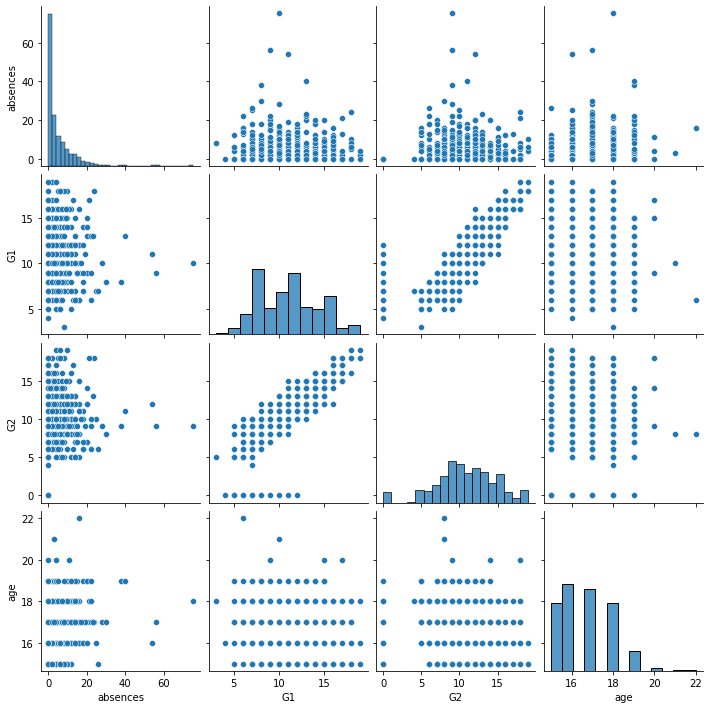

In [70]:
# numerical feature 시각화
import seaborn as sns
sns.pairplot(df[num_feat])

TypeError: list indices must be integers or slices, not str

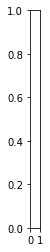

In [67]:
import matplotlib.pyplot as plt

# setting chart design
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# pie chart는 matplotlib에만 있음
for i in range(len(cate_feat)):
    plt.subplot(1,len(cate_feat),i+1)
    plt.pie(data[cate_feat[i]].value_counts(), labels=set(df[cate_feat[i]]), autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
    plt.title(cate_feat[i])

plt.suptitle('categorical features')
plt.tight_layout()
plt.show()

### 1-1-2. 전처리 하시오 (시각화 포함)
- 범주형 자료형 형변환
- pd.get_dummies()
- min-max scaling 할 것

In [72]:
# 범주형 변수들 자료형 변환
df = df.astype({col:'object' for col in cate_feat})

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    object
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [75]:
df.school

0      GP
1      GP
2      GP
3      GP
4      GP
       ..
390    MS
391    MS
392    MS
393    MS
394    MS
Name: school, Length: 395, dtype: object

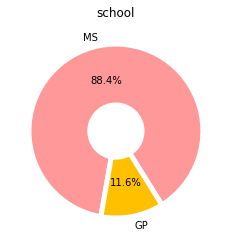

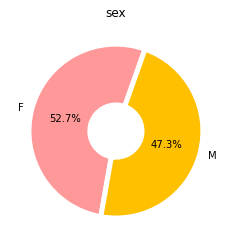

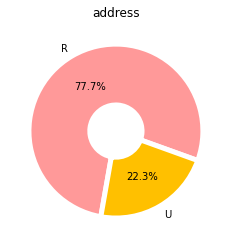

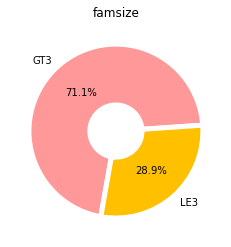

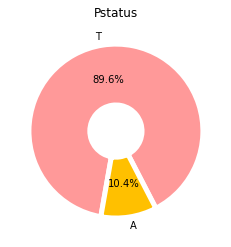

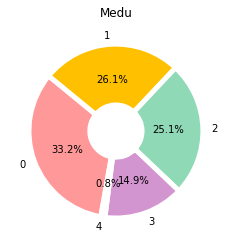

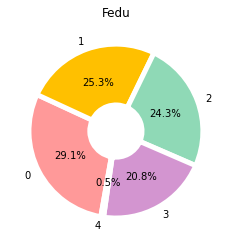

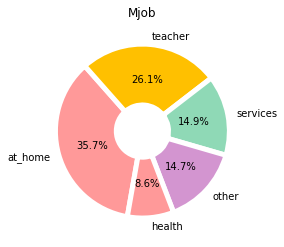

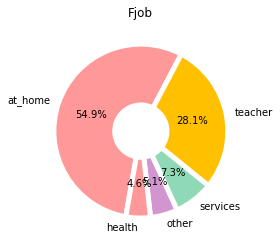

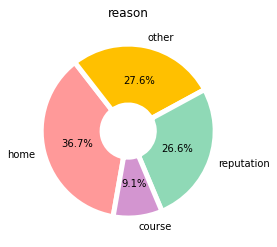

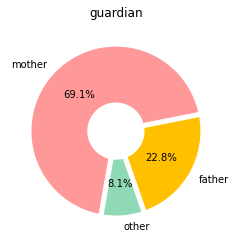

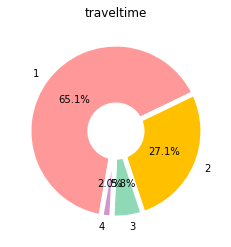

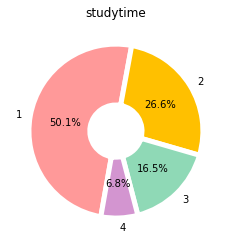

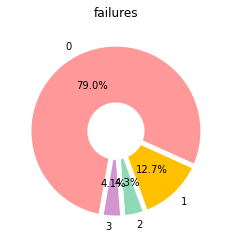

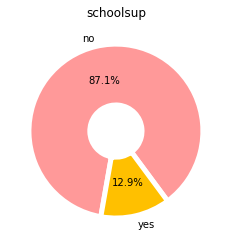

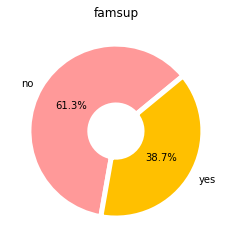

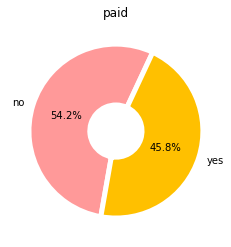

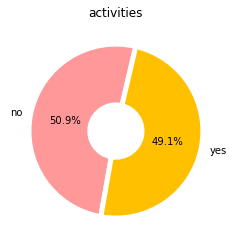

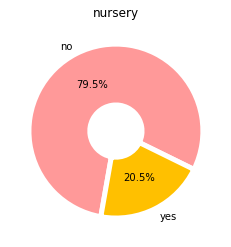

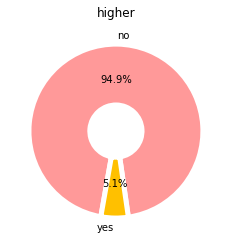

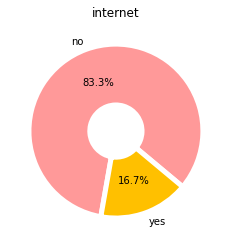

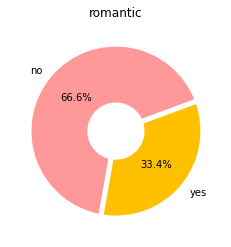

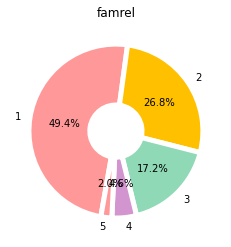

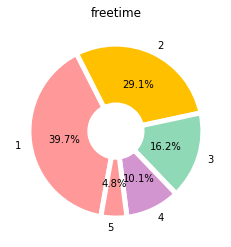

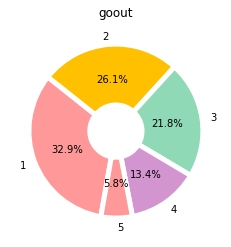

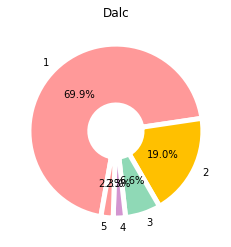

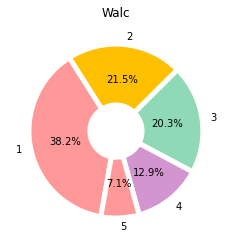

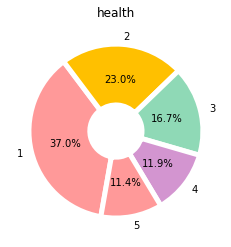

In [77]:
import matplotlib.pyplot as plt

# setting chart design
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# pie chart는 matplotlib에만 있음
for i in range(len(cate_feat)):
    plt.pie(df[cate_feat[i]].value_counts(), labels=set(df[cate_feat[i]]), autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
    plt.title(cate_feat[i])
    plt.show()

### 1-1-3. 여기에 하지 않았지만 추가할 수 있는 전처리를 하시고, 타당한 이유와 기대효과를 쓰세요.
- 중복된 데이터 처리 : 같은 데이터의 row가 395개나 되는데 이를 drop하는게 나을지 잠시 고민함
    - 학생을 여러 카테고리로 나눠도 모든 feature에 대해 같은 것을 띄는 학생들이 소수 있을것이라 판단해 drop하지 않음
- 결석일수의 불균일 : 로그분포를 따름
    - 로그 정규화를 할까 고민함 -> 실험해보는게 좋아보임

In [78]:
df.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### 1-2-1. 적용 가능한 알고리즘 3개 언급하고, 그 중 2개를 선택한 이유를 논리적으로 설명하세요. 
- 랜덤포레스트
- 의사결정틜
- svm

### 1-2-2. 모델 성능 평가 지표를 뭘로 쓸건지, 그 이유는 뭔지 쓰세요.
- mse

### 1-2-3. 2개 알고리즘을 실제로 프로그래밍하고 성능 평가를 시각화 통해 비교하고 설명하세요.

### 1-3-1. 실제로 사용가능한 모델인지 설명해보세요.

### 1-3-2. 다양한 환경에서 적용할 수 있는 방안을 설명해보세요.

### 1-3-3. 추가적으로 모델을 개선할 수 있는 방안을 설명해보세요.
- cross validation
- boosting

## 2. 연구개발비(X1) : 1 2 3 4 5 7 8 9 11 12, 광고비(X2) : (낮음, 낮음, 낮음, 낮음, 높음, 높음, 높음, 높음, 높음, 높음), 매출액(Y) : 15 16 17 18 20 22 24 26 28 29
### 2-1. 광고비를 가변수화 해서, 다중선형회귀방정식 만들고, 회귀계수 검정하시오. 
### 2-2. 회귀 모형을 검정하시오.

In [17]:
x1 = [1, 2, 3, 4, 5, 7, 8, 9, 11, 12] #연구개발비
x2 = ['낮음', '낮음', '낮음', '낮음', '높음', '높음', '높음', '높음', '높음', '높음'] #광고비
y = [15, 16, 17, 18, 20, 22, 24, 26, 28, 29]

import pandas as pd
df = pd.DataFrame({'x1' : x1, 'x2' : x2, 'y' : y})

In [18]:
# 가변수화
# 낮음 : 0, 높음 : 1
df.x2 = pd.get_dummies(df.x2, drop_first=True)
df

,x1,x2,y
0,1,0,15
1,2,0,16
2,3,0,17
3,4,0,18
4,5,1,20
5,7,1,22
6,8,1,24
7,9,1,26
8,11,1,28
9,12,1,29


In [25]:
import statsmodels.api as sm
df_input = df[df.columns[:-1]]
df_target = df[df.columns[-1]]

# add constant
df_input = sm.add_constant(df_input, has_constant = "add")

# ols test
ols_model = sm.OLS(df_target, df_input)
ols_model = ols_model.fit()
ols_model.summary()

C:\Users\ja036\anaconda3\envs\adp\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     545.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           2.07e-08
Time:                        19:24:10   Log-Likelihood:                -4.6455
No. Observations:                  10   AIC:                             15.29
Df Residuals:                       7   BIC:                             16.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2609      0.296     44.834      0.000      12.561      13.960
x1             1.2957      0.074     17.431      0.000       1.120       1.471
x2             0.3435      0.546      0.629      0.549      -0.948       1.635
==============================================================================
Omnibus:                        0.263   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.099
Skew:                           0.157   Prob(JB):                        0.951
Kurtosis:                       2.625   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2-1)
y = 13.2609 + 1.2957 * x1 + 0.3435 * x2

### 2-2)
- x1
    - p-value가 유의수준 0.05보다 작으므로 귀무가설 기각
        - 귀무가설 : x1의 회귀계수가 유의미하지 않다.
    - 연구개발비의 회귀계수는 유의미하다
- x2
    - p-value가 유의수준 0.05보다 크므로 귀무가설 기각 실패
        - 귀무가설 : x2의 회귀계수가 유의미하지 않다.
    - 광고비의 회귀계수는 유의미하지 않다.

## 3. 각각 표본수는 12개인데 A생산라인에서 만든 제품의 평균은 5.75mm, $\sigma = 0.03$ B생산라인에서 만든 제품의 평균은 5.56mm, $\sigma = 0.04$라면 5% 유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하시오. Z(0.05) = 1.65.
### 3-1. 귀무가설과 대립가설을 세우기
### 3-2. 차이가 있는지 여부 검정

### 3-1)
- 귀무가설 : A생산라인과 B생산라인의 차이는 없다
- 대립가설 : A생산라인과 B생산라인의 차이는 있다.

In [26]:
z_5 = 1.65
n = 12

m_a = 5.75
s_a = 0.03

m_b = 5.56
s_b = 0.04

In [30]:
from math import sqrt
z_score = (m_a - m_b) / sqrt(s_a*s_a/n + s_b*s_b/n)
print(z_score)

13.163586137523495


### 3-2)
- z_score가 1.96보다 크므로 귀무가설 기각

- A생산라인과 B생산라인의 차이는 있다

## 4. 베이지안 분류 문제: 바이러스 감염 분류표를 보고 베이지안 분류 방법으로, 양성으로 예측된 사람이 실제로 양성일 확률은? (유병률 0.01)

In [ ]:
from pandas import DataFrame
DataFrame([[370,10], [15, 690]], columns=['양성(실제)', '음성(실제)'], index=['양성(예측)', '음성(예측)'])

,양성(실제),음성(실제)
양성(예측),370,10
음성(예측),15,690


In [43]:
p = (0.01 * 370/385)/(0.01 * 370/385 + 0.99 * 10/700)

print(f'양성으로 예측된 사람이 실제로 양성일 확률 : {p}')

양성으로 예측된 사람이 실제로 양성일 확률 : 0.4045926735921268


## 5.  9개 표본 [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7], 
one-sample t-test로 Z(0.05) = 1.65, Z(0.025) = 1.96, T(0.05, 8) = 1.86, T(0.025, 8) = 2.306
### 5-1. 위의 9개 표본의 평균에 대한 95% 신뢰구간?
### 5-2. 과거에 모집단 표준편차가 0.4일 때 표본 평균에 대한 95% 신뢰구간은?

In [45]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
z_5 = 1.65
z_25 = 1.96
t_5 = 1.86
t_25 = 2.306

n = len(data)

import statistics as st

m = st.mean(data)
std = st.stdev(data)

### 5-1) 모 표준편차를 모를 때

In [46]:
from math import sqrt
interval_right = m + t_25 * std/sqrt(n)
interval_left = m - t_25 * std/sqrt(n)
print(f'신뢰구간 : {interval_left} ~ {interval_right}')

신뢰구간 : 3.4777340458695325 ~ 4.300043731908246


### 5-2) 모 표준편차를 알 때

In [48]:
from math import sqrt
interval_right = m + z_25 * 0.4/sqrt(n)
interval_left = m - z_25 * 0.4/sqrt(n)
print(f'신뢰구간 : {interval_left} ~ {interval_right}')

신뢰구간 : 3.6275555555555554 ~ 4.150222222222222


In [49]:
std

0.5348935511960404

In [50]:
import numpy as np
np.std(data)

0.5043024763515652